In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('day - day.csv')

In [5]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

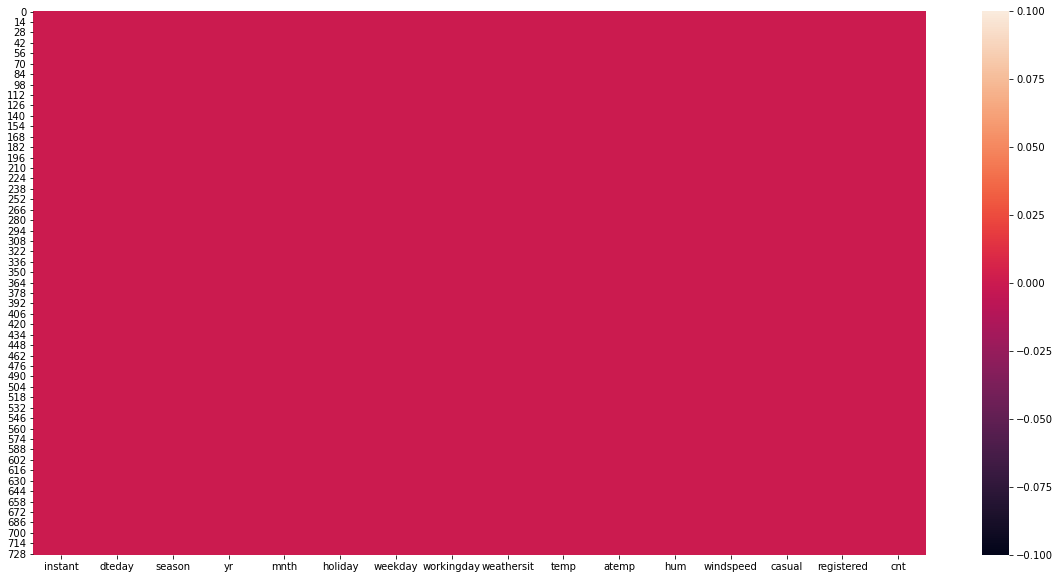

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

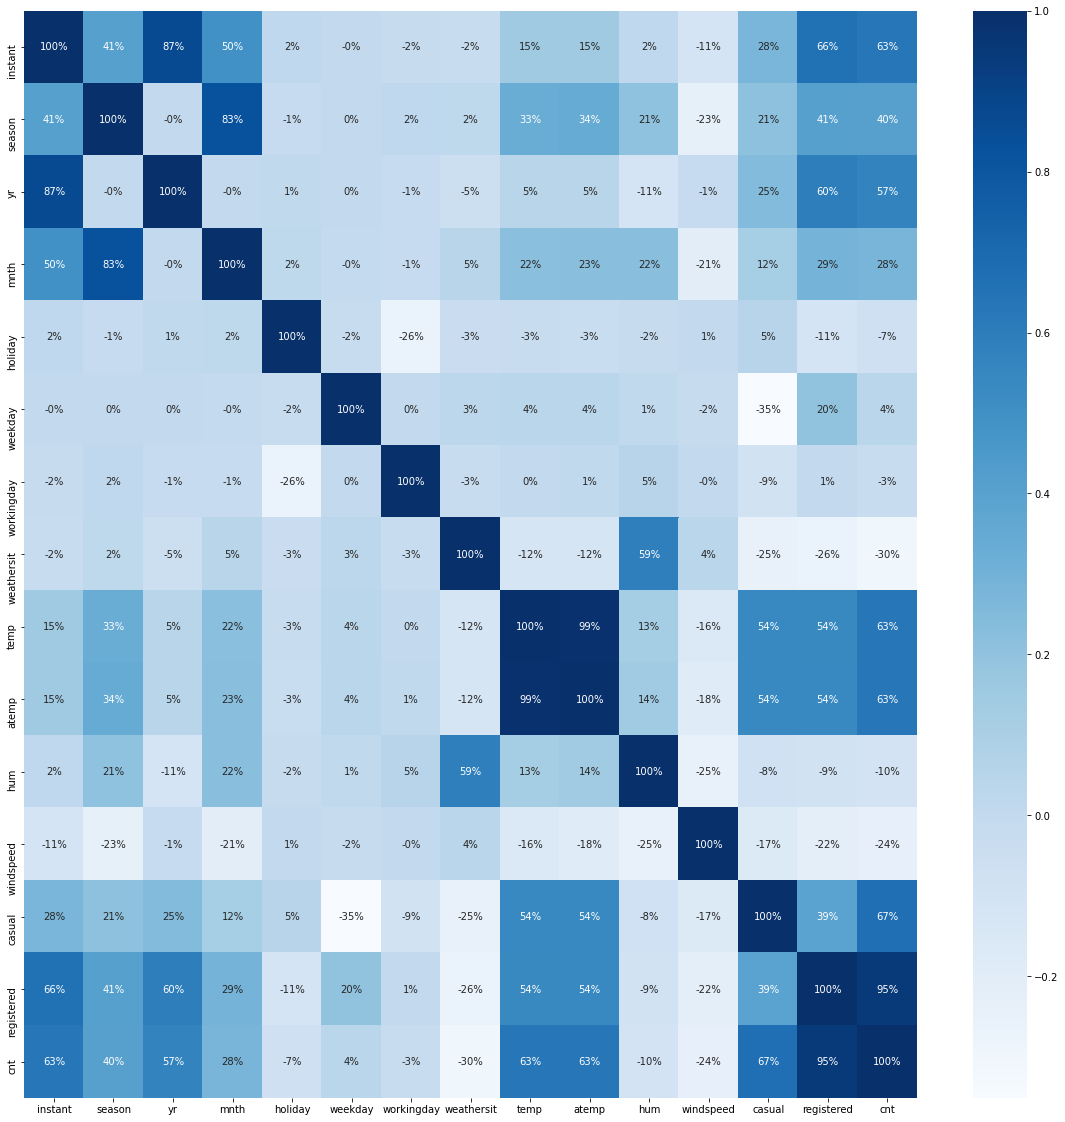

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='Blues')
plt.show()

In [ ]:
Registered,casual,temp/atemp

Text(0.5, 1.0, 'Correlation with target variable')

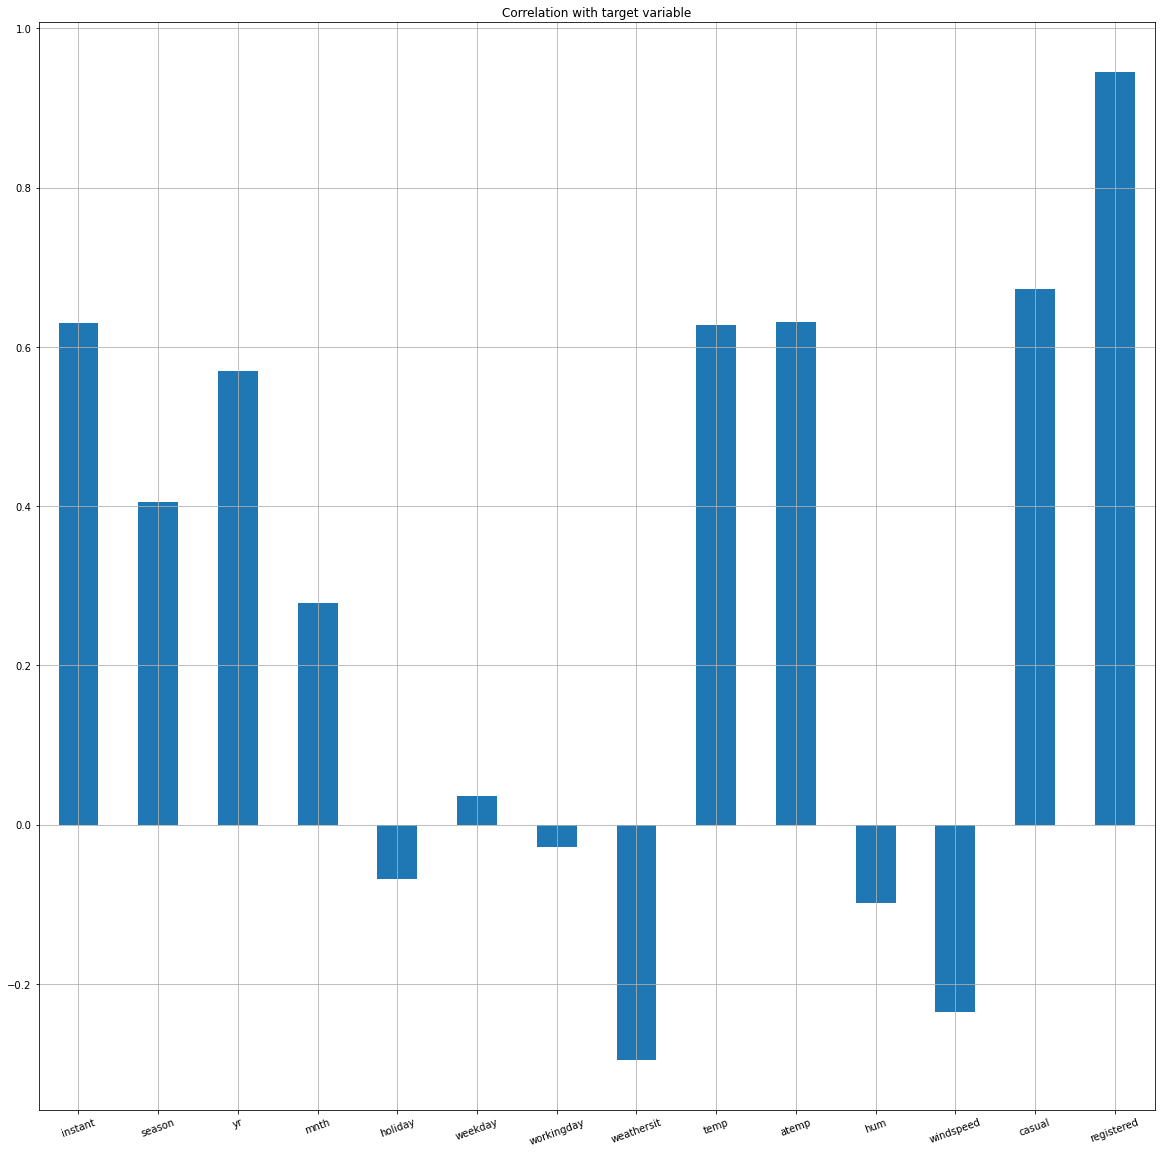

In [10]:
plt.figure(figsize=(20,20))
df.drop('cnt',axis=1).corrwith(df['cnt']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable")

In [11]:
df.drop(['instant','dteday'],axis=1,inplace=True)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [16]:
df['yr'].unique()

array([0, 1], dtype=int64)

In [17]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [18]:
df['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [19]:
df['workingday'].unique()

array([1, 0], dtype=int64)

In [20]:
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [21]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

<Figure size 720x432 with 0 Axes>

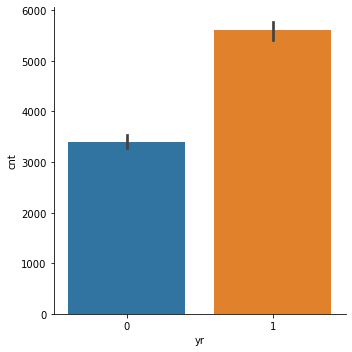

<Figure size 720x432 with 0 Axes>

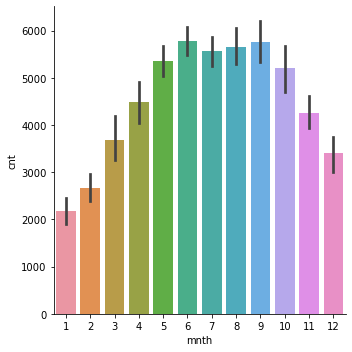

<Figure size 720x432 with 0 Axes>

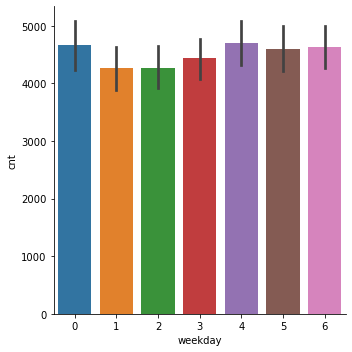

<Figure size 720x432 with 0 Axes>

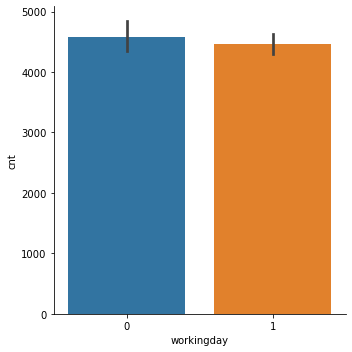

<Figure size 720x432 with 0 Axes>

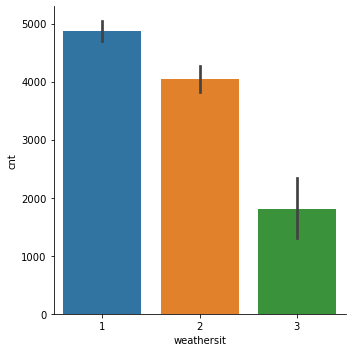

<Figure size 720x432 with 0 Axes>

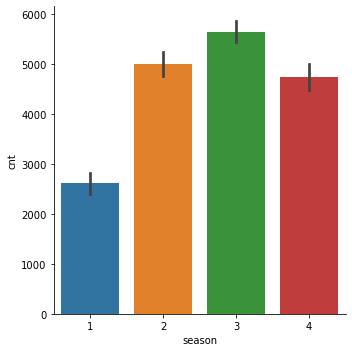

In [22]:
list=['yr','mnth','weekday','workingday','weathersit','season']
for i in list:
    plt.figure(figsize=(10,6))
    sns.catplot(y='cnt',x=i,data=df,kind="bar")
    plt.show()

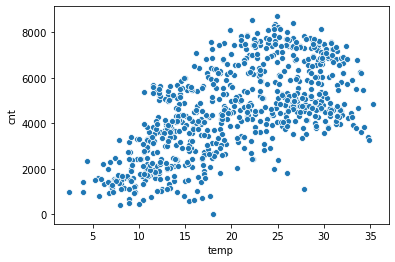

In [35]:
sns.scatterplot(df['temp'],df['cnt'])
plt.show()

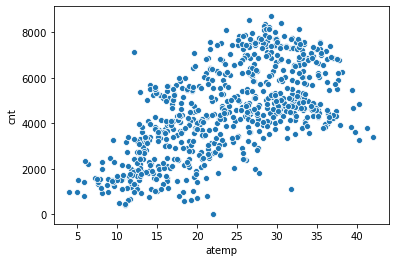

In [36]:
sns.scatterplot(df['atemp'],df['cnt'])
plt.show()

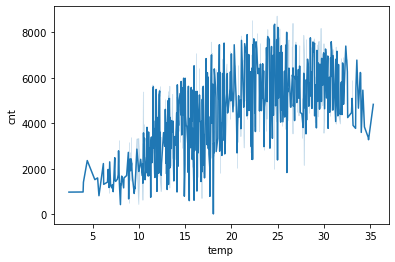

In [37]:
sns.lineplot(df['temp'],df['cnt'])
plt.show()

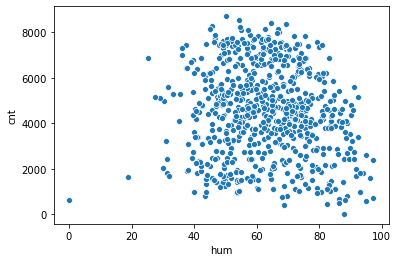

In [38]:
sns.scatterplot(df['hum'],df['cnt'])
plt.show()

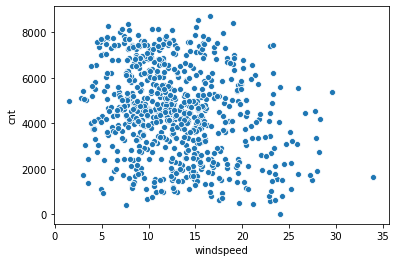

In [39]:
sns.scatterplot(df['windspeed'],df['cnt'])
plt.show()

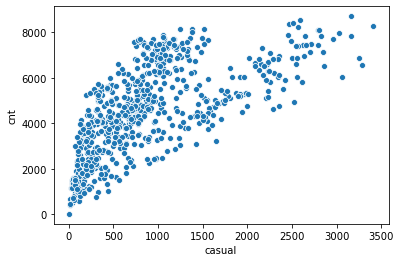

In [40]:
sns.scatterplot(df['casual'],df['cnt'])
plt.show()

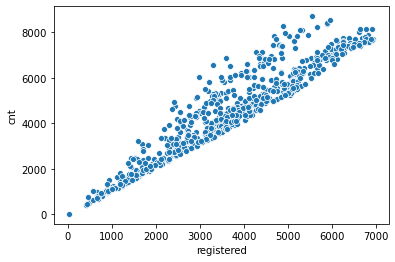

In [41]:
sns.scatterplot(df['registered'],df['cnt'])
plt.show()

In [23]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [24]:
x=df.drop(['cnt'],axis=1)
x.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [26]:
x=pd.DataFrame(x)

In [27]:
y=df['cnt'].values
y

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425,
       1536, 1685, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
       2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944,
       4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351,
       4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
       4105, 3409, 4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274,
       4492, 4978, 4677, 4679, 4758, 4788, 4098, 39

In [28]:
x.shape

(730, 13)

In [29]:
y.shape

(730,)

In [30]:
y=y.reshape(-1,1)
y.shape

(730, 1)

In [31]:
#Importing all the libraries,metrices required for ML 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42) 

In [33]:
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),
       KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    Score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',Score)
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Squared Error:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('****************************************')
    print('\n')

Score of LinearRegression() is: 1.0
Mean Absolute Error: 2.0650513262857924e-12
Mean Squared Error: 6.5367098063907924e-24
RMSE: 2.556699005825831e-12
r2_score: 1.0
****************************************


Score of Lasso() is: 0.9999996251261394
Mean Absolute Error: 0.9608910840800845
Mean Squared Error: 1.3595395215030248
RMSE: 1.1659929337277413
r2_score: 0.9999996028038881
****************************************


Score of Ridge() is: 0.999991767108765
Mean Absolute Error: 3.542392860354256
Mean Squared Error: 20.489477079998487
RMSE: 4.5265303577904445
r2_score: 0.9999940138991893
****************************************


Score of ElasticNet() is: 0.9377650160776132
Mean Absolute Error: 328.3309690143487
Mean Squared Error: 169177.91679461687
RMSE: 411.31243209343535
r2_score: 0.9505738452515902
****************************************


Score of SVR() is: 0.033979377628699514
Mean Absolute Error: 1536.2059542021846
Mean Squared Error: 3342975.9291777676
RMSE: 1828.380684971750